In [1]:
# TimeStamp
import time, datetime
st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')
print('Last Run: ', st)

Last Run:  2016-01-30 22:31:09


In [2]:
# Run this cell only once
from IPython.display import clear_output
import pandas as pd

%cd ../
clear_output()

pd.set_option('display.max_columns', 9)
pd.set_option('precision', 4)

In [3]:
# Import LamAna and setup plotting in Jupyter
import lamana as la

%matplotlib inline

In [4]:
# Build dicts of loading parameters and and material properties
load_params = {
    'R' : 12e-3,                                           # specimen radius
    'a' : 7.5e-3,                                          # support ring radius
    'r' : 2e-4,                                            # radial distance from center loading
    'P_a' : 1,                                             # applied load
    'p' : 2,                                               # points/layer
}

# Quick Form: a dict of lists
mat_props = {
    'HA' : [5.2e10, 0.25],
    'PSu' : [2.7e9, 0.33],
}

# Select geometries
single_geo = ['400-200-800'] 
multiple_geos = [
    '350-400-500',  '400-200-800', '200-200-1200', '200-100-1400',
    '100-100-1600', '100-200-1400', '300-400-600'
]

This file is forked from *Demo - Academic 0.1.3.ipynb*. All cells above this level are hidden in readthedocs by the `nbsphinx` extension. 

# Quick View

Here is a brief gallery of some stress distribution plots produced by LamAna.

## Single Geometry Plots

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


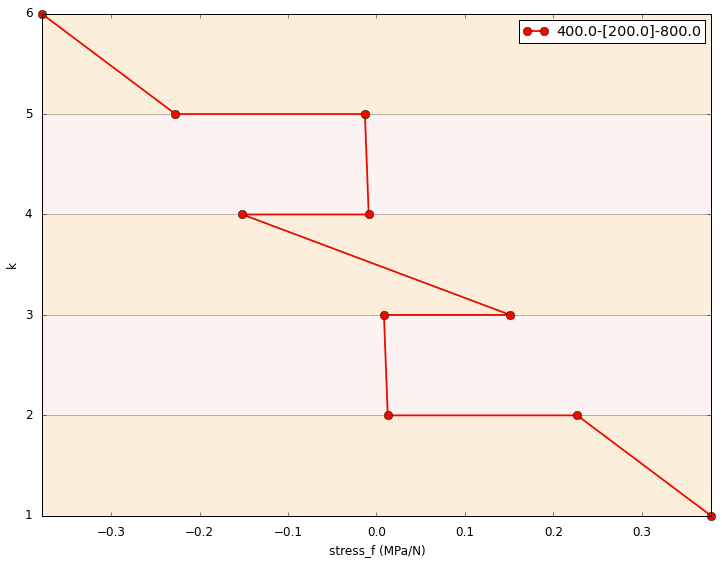

In [5]:
case1 = la.distributions.Case(load_params, mat_props)      # instantiate a User Input Case Object through distributions
case1.apply(single_geo)
case1.plot()

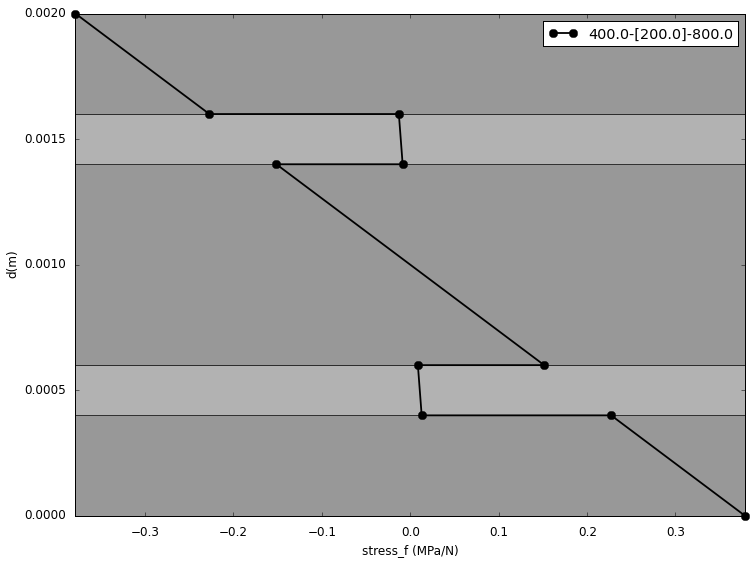

In [6]:
case1.plot(normalized=False, grayscale=True)

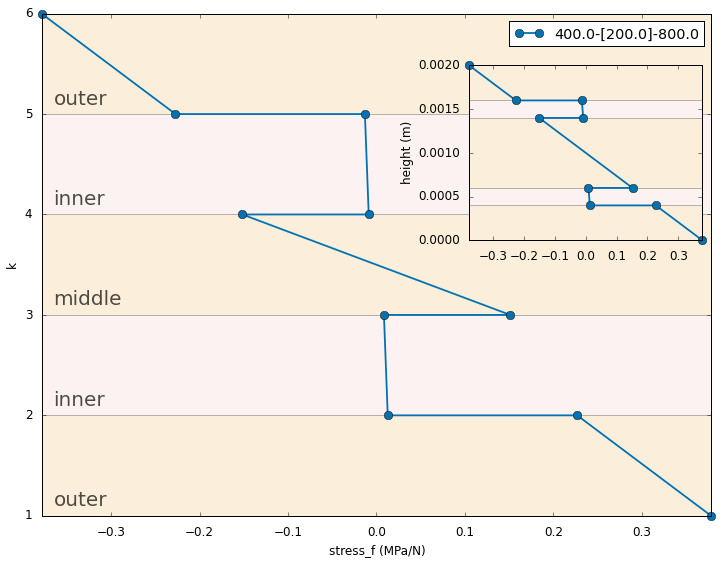

In [7]:
case1.plot(annotate=True, colorblind=True, inset=True)

## Multiple Geometry Plots

In [8]:
title = 'Stress Distributions of HA/PSu for Multiple Geometries'
multiple_geos = ['350-400-500',  '400-200-800', '200-200-1200', '200-100-1400',
                 '100-100-1600', '100-200-1400', '300-400-600']

In [9]:
case2 = la.distributions.Case(load_params, mat_props)      # instantiate a User Input Case Object through distributions
case2.apply(multiple_geos)

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


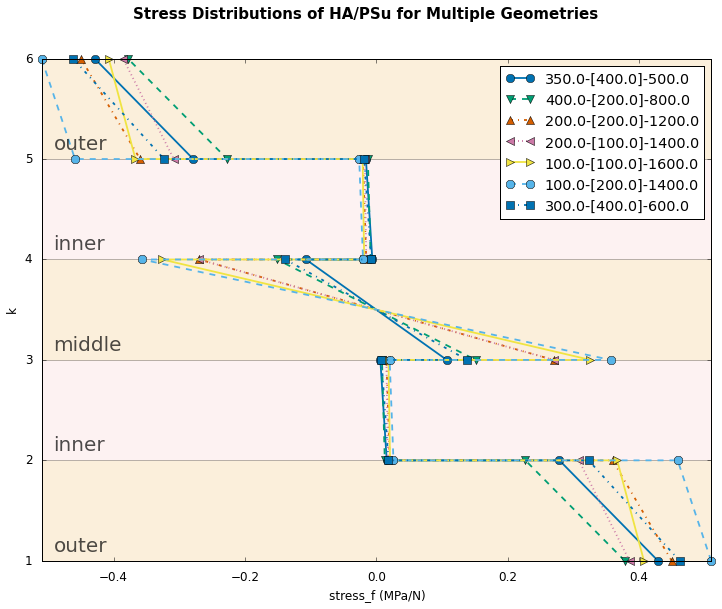

In [10]:
case2.plot(title, colorblind=True, annotate=True)

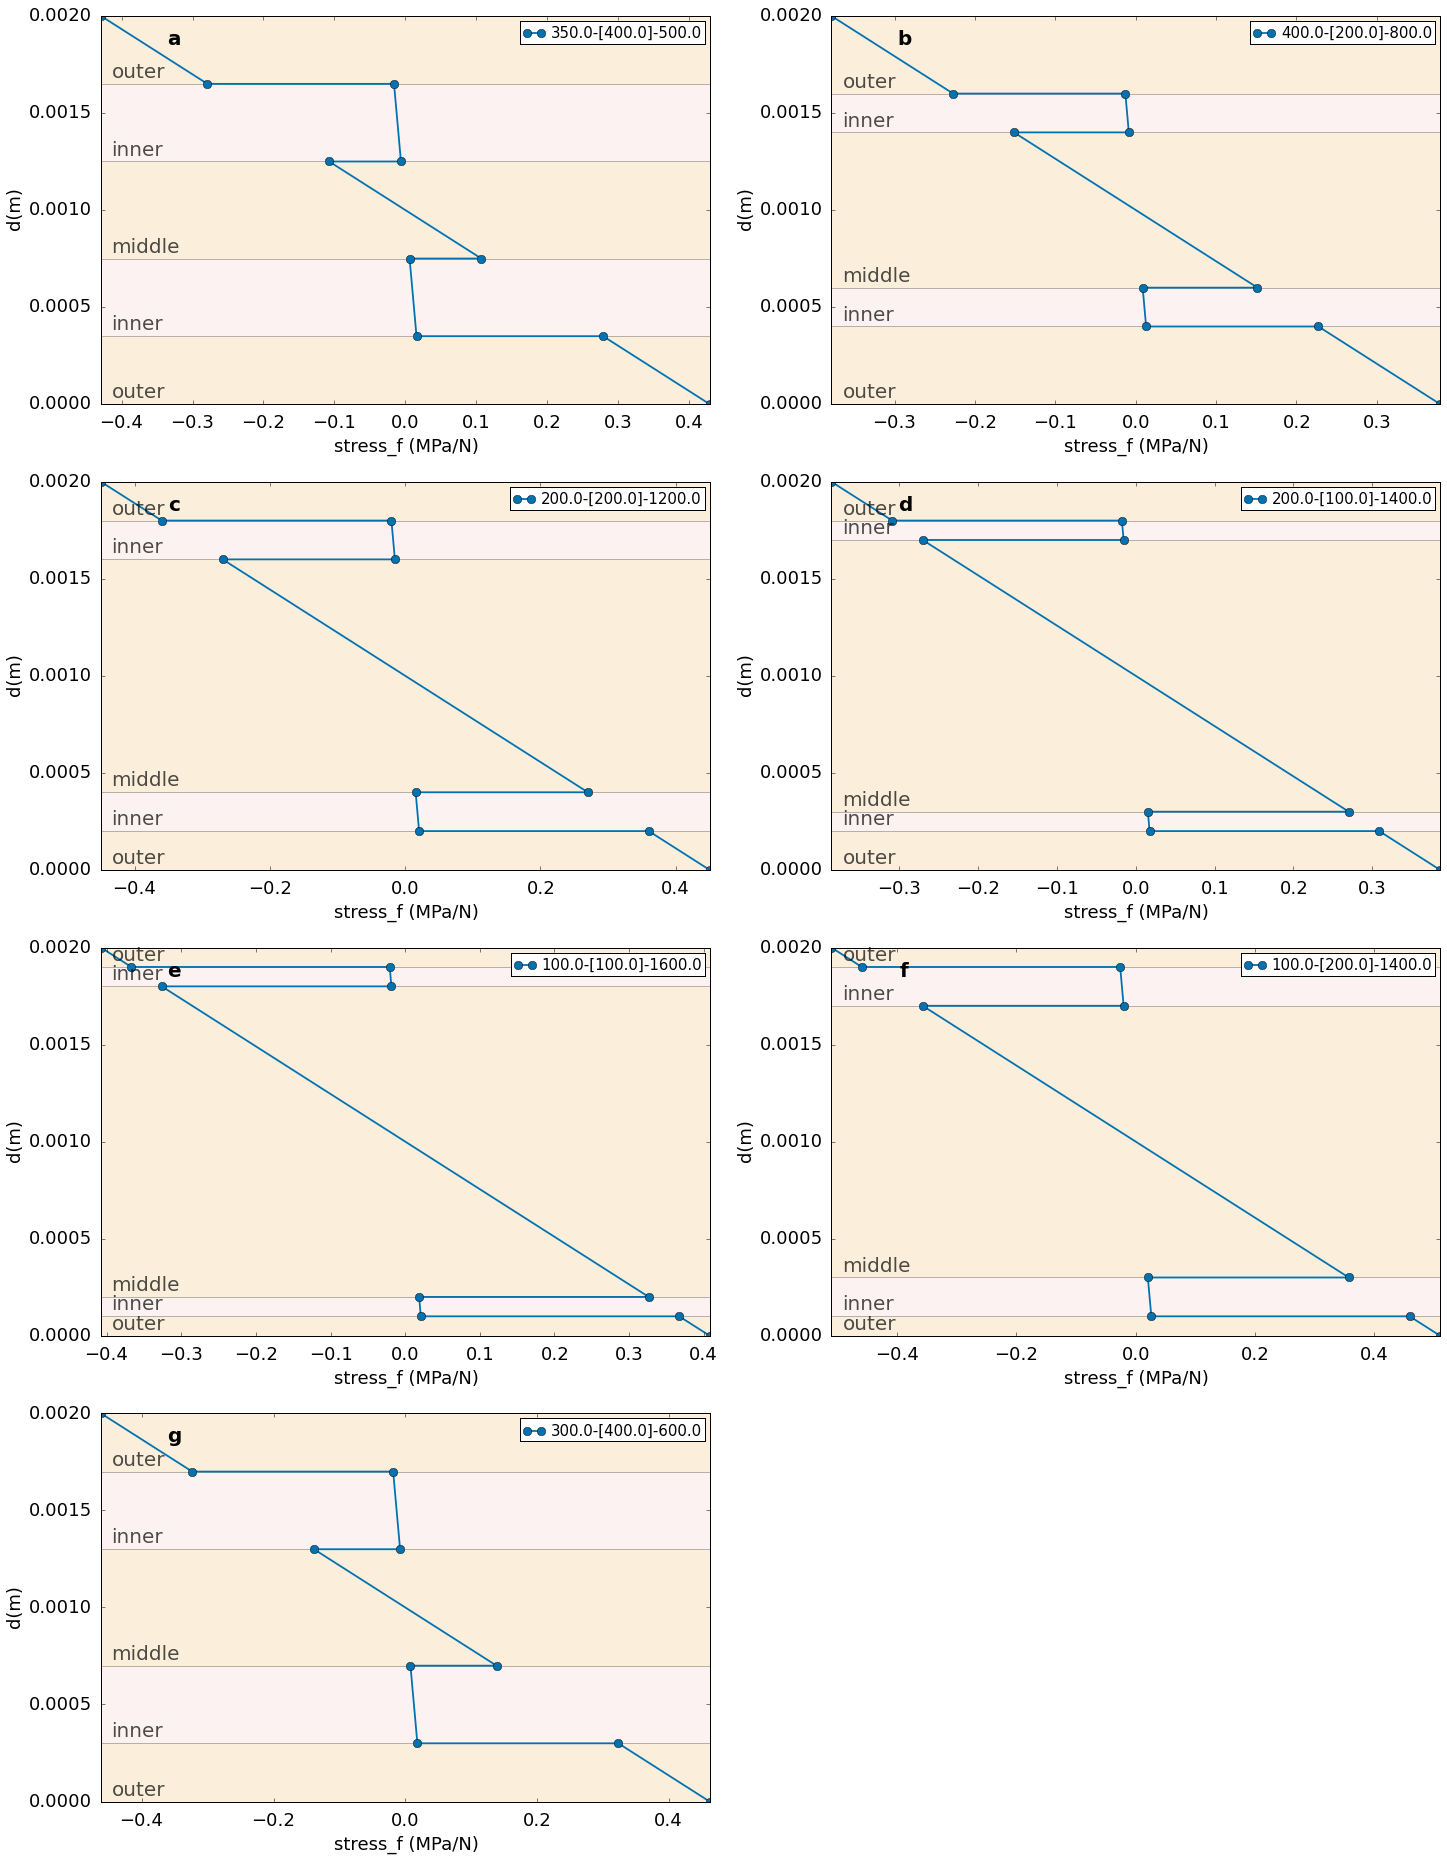

In [11]:
case2.plot(title, colorblind=True, annotate=True, separate=True)

### Halfplots

The following has not been implemented yet, but demonstrates the idea of several multi-plots of tensile data. Each plot show cases some pattern of interest.  
    
- (a) constant total thickness; varied layer thicknesses
- (b) constant outer layer
- (c) constant inner layer
- (d) constant middle layer


![halfplots](../docs/_images/halfplots.png)

In [12]:
# Setup a list of geometry strings
const_total = ['350-400-500',  '400-200-800', '200-200-1200',
               '200-100-1400', '100-100-1600', '100-200-1400',]

# Setup cases
cases1 = la.distributions.Cases(
    const_total, load_params=load_params, mat_props=mat_props,
    model='Wilson_LT', ps=[2, 3]
) 

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props

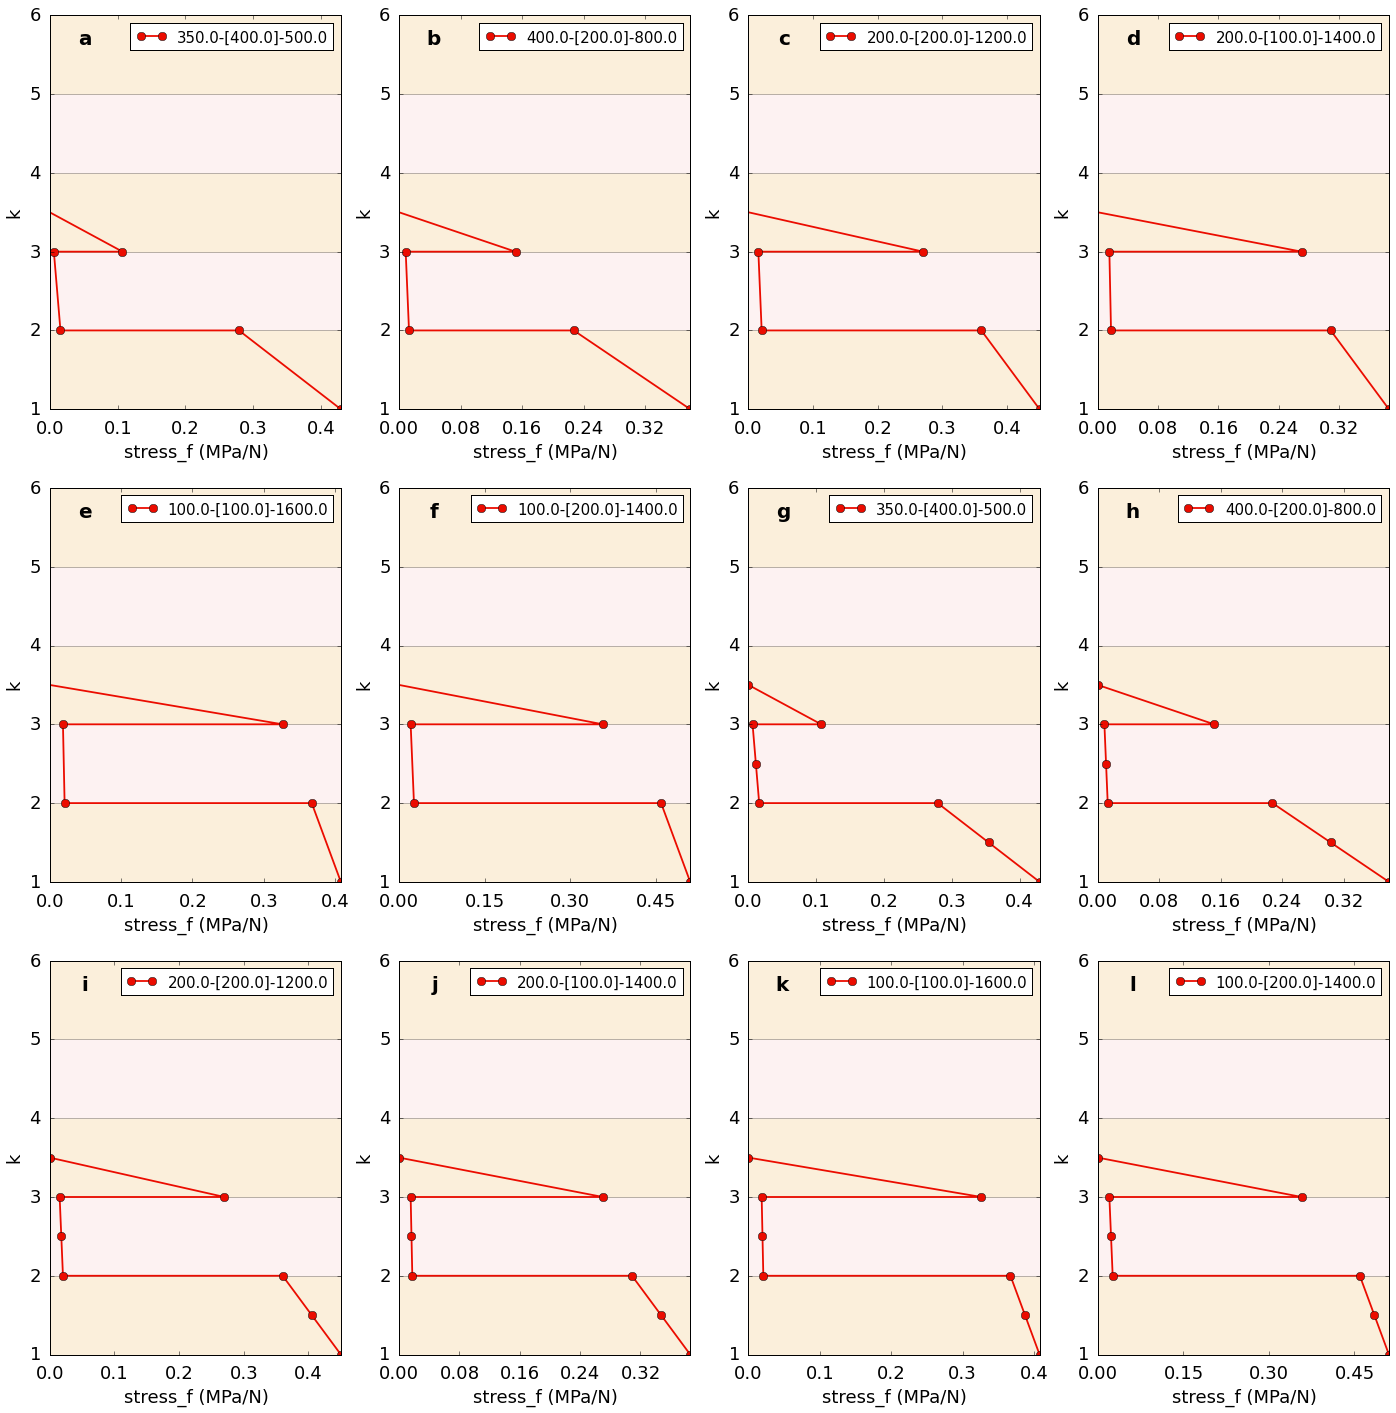

In [13]:
cases1.plot(extrema=False)

---

## Data Analysis

In [14]:
case1

<<class 'lamana.distributions.Case'> p=2, size=1>

In [15]:
case1.LMs

[<lamana LaminateModel object (400.0-[200.0]-800.0), p=2>]

In [16]:
#df = case1.frames
df = case1.frames[0]
df
#df.style                                                   # pandas 0.17.1, css on html table
#df.style.bar(subset=['stress_f (MPa/N)', 'strain'], color='#d65f5f')

Accessing frames method.


,layer,side,type,matl,...,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
0,1,Tens.,outer,HA,...,5.965e-06,274182.824,378730.663,0.379
1,1,Tens.,outer,HA,...,3.579e-06,164509.695,227238.398,0.227
2,2,Tens.,inner,PSu,...,3.579e-06,9854.181,12915.334,0.013
3,2,Tens.,inner,PSu,...,2.386e-06,6569.454,8610.223,0.009
4,3,Tens.,middle,HA,...,2.386e-06,109673.130,151492.265,0.151
5,3,Comp.,middle,HA,...,-2.386e-06,-109673.130,-151492.265,-0.151
6,4,Comp.,inner,PSu,...,-2.386e-06,-6569.454,-8610.223,-0.009
7,4,Comp.,inner,PSu,...,-3.579e-06,-9854.181,-12915.334,-0.013
8,5,Comp.,outer,HA,...,-3.579e-06,-164509.695,-227238.398,-0.227
9,5,Comp.,outer,HA,...,-5.965e-06,-274182.824,-378730.663,-0.379
